In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier

import warnings

warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
carseat_df = pd.read_csv("/Users/jaamiemaarshj/Desktop/DAE Course Materials/ML/Assignment-2/Carseats.csv")
display(carseat_df.head())

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Explonatory data analysis (EDA) 


In [3]:
carseat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# checking the dimensions of the dataset

print("The dimensions of the dataset are:", carseat_df.shape)

The dimensions of the dataset are: (400, 11)


In [5]:
# Cross checking for Null values since decision trees are sensitive to null values
carseat_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

It is been found that there are no null values in the dataset

#### Feature encoding for target variable

In [6]:
# encoding the sales column to be of binary classification 
carseat_df['Sales_Encoded'] = carseat_df['Sales'].apply(lambda x: 'Yes' if x > 8 else 'No')

#dropping the original column
carseat_updated_df = carseat_df.drop(columns=['Sales'])
display(carseat_updated_df.head(5))


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Encoded
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


The above snip creates a new binary column, Sales_Encoded, indicating whether sales exceed 8 (encoded as 'Yes' or 'No').It also helps analyze factors influencing higher sales (greater than 8).
This step is very relevant as it cleans up the dataset, making it easier to focus on relevant features for modeling.

In [24]:
column_names = ["CompPrice", "Income", 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'   ]
# displaying only 4 columns for better readability.
for col in column_names:
    print(f"Top 4 values for each {col}:")
    print(carseat_updated_df[col].value_counts().head(4))
    print('-----------------------------') 

Top 4 values for each CompPrice:
121    16
122    14
131    14
123    13
Name: CompPrice, dtype: int64
-----------------------------
Top 4 values for each Income:
69     11
42     10
32      8
100     8
Name: Income, dtype: int64
-----------------------------
Top 4 values for each Advertising:
0     144
10     25
11     22
13     20
Name: Advertising, dtype: int64
-----------------------------
Top 4 values for each Population:
276    4
148    4
237    4
170    4
Name: Population, dtype: int64
-----------------------------
Top 4 values for each Price:
120    12
128    12
107    10
104    10
Name: Price, dtype: int64
-----------------------------
Top 4 values for each ShelveLoc:
2    219
0     96
1     85
Name: ShelveLoc, dtype: int64
-----------------------------
Top 4 values for each Age:
62    14
80    13
61    12
76    11
Name: Age, dtype: int64
-----------------------------
Top 4 values for each Education:
17    49
12    49
10    48
11    48
Name: Education, dtype: int64
-----------

The above shows the frequency of values across all the value catagories of the column. It can also be found that the columns 'ShelveLoc', 'US', 'Urban' are catagorical. Generally decision tree can handle them without converting to a numerical value but it requires numerical inputs when using sklearn.

In [8]:
le = LabelEncoder()

carseat_updated_df['ShelveLoc'] = le.fit_transform(carseat_updated_df['ShelveLoc'])
carseat_updated_df['Urban'] = le.fit_transform(carseat_updated_df['Urban'])
carseat_updated_df['US'] = le.fit_transform(carseat_updated_df['US'])

display(carseat_updated_df.head(3))

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Encoded
0,138,73,11,276,120,0,42,17,1,1,Yes
1,111,48,16,260,83,1,65,10,1,1,Yes
2,113,35,10,269,80,2,59,12,1,1,Yes


Generally decision tree can handle them without converting to a numerical value but it requires numerical inputs when using sklearn. The encoding can be done either before the test train split or after.

In [9]:
carseat_updated_df['Sales_Encoded'].value_counts()

No     236
Yes    164
Name: Sales_Encoded, dtype: int64

There is a slight difference in the values being skewed towards the 'No' aspect, which is that the sales are not high.

#### Checking for Missing values

In [10]:

carseat_updated_df.isnull().sum()

CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
ShelveLoc        0
Age              0
Education        0
Urban            0
US               0
Sales_Encoded    0
dtype: int64

Checking for null values are very important as decision trees are very sensitive.

### Test-train Splitting

In [11]:
# catagorical_cols = ['Price', 'US', 'Urban' ]
# numerical_cols = ["CompPrice", "Income", 'Advertising', 'Population', 'ShelveLoc', 'Age', 'Education']
X = carseat_updated_df.drop(['Sales_Encoded'], axis=1)
y = carseat_updated_df['Sales_Encoded']

In [12]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


### Baseline model

In [13]:

from sklearn.metrics import accuracy_score

# Instantiate the dummy classifier (strategy='most_frequent' predicts the majority class)
baseline_clf = DummyClassifier(strategy='most_frequent')

# Fit the model
baseline_clf.fit(X_train, y_train)

# Predict using the baseline model
y_pred_dummy = baseline_clf.predict(X_test)

# Calculate accuracy for baseline
baseline_acc = accuracy_score(y_test, y_pred_dummy)
print(f"The baseline Accuracy of the carseats dataset is: {baseline_acc}")


The baseline Accuracy of the carseats dataset is: 0.5375


The reason for testing out a baseline model is to figure out if the actual decision tree model is an better option than this.

### Creating the decision tree

In [14]:
# The DecisionTreeClassifier model with entropy criterion

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

The reason for choosing max_depth=4 since the accuracy was the highest (75%) in the set of trials. The other values such as 3,5,6 had a less accuracy values was less than the above.

In [15]:
y_pred_en = clf_en.predict(X_test)

#### Checking for Accuracy

In [16]:
print('Model Test accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model Test accuracy score with criterion entropy: 0.7500


#### Checking for other metrics

In [34]:
# Calculate and print precision, recall, and F1 score
report = classification_report(y_test, y_pred_en, target_names=['No', 'Yes'])
print('\n The classification report:\n\n',report)



 The classification report:

               precision    recall  f1-score   support

          No       0.74      0.81      0.78        43
         Yes       0.76      0.68      0.71        37

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.75        80
weighted avg       0.75      0.75      0.75        80



#### Plotting the confusion matrix

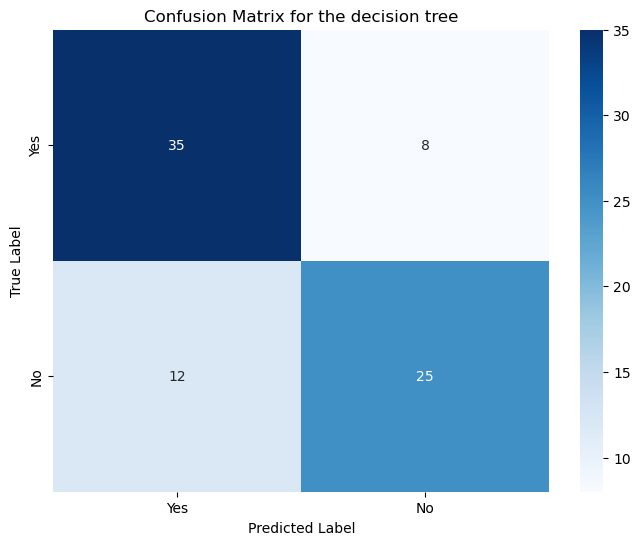

In [37]:
class_labels = ['Yes', 'No'] 
conf_matrix = confusion_matrix(y_test, y_pred_en)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for the decision tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

True Negatives (TN): 35 (Correctly predicted No)

False Positives (FP): 8 (Incorrectly predicted Yes when it was No)

False Negatives (FN): 12 (Incorrectly predicted No when it was Yes)

True Positives (TP): 25 (Correctly predicted Yes)

#### Check for overfitting - Test accuracy Vs Train Accuracy

In [17]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en[:3]

array(['No', 'Yes', 'No'], dtype=object)

In [18]:
y_train_en = clf_en.score(X_train, y_train)

In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8063
Test set score: 0.7500


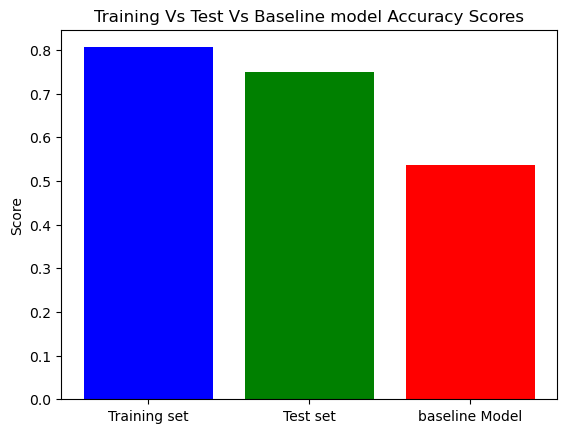

In [20]:
train_score = clf_en.score(X_train, y_train)
test_score = clf_en.score(X_test, y_test)

# Data for bar chart
categories = ['Training set', 'Test set', 'baseline Model']
scores = [train_score, test_score, baseline_acc]

# Create bar chart
plt.bar(categories, scores, color=['blue', 'green', 'red'])

# Add labels and title
plt.ylabel('Score')
plt.title('Training Vs Test Vs Baseline model Accuracy Scores')

# Display the plot
plt.show()

There seems to be no overfit for the testing data as the accuracy values are not far off and also the model performs way better than the baseline model, which shows only 50% accuracy.

### Plotting the tree

#### Using Sklearn

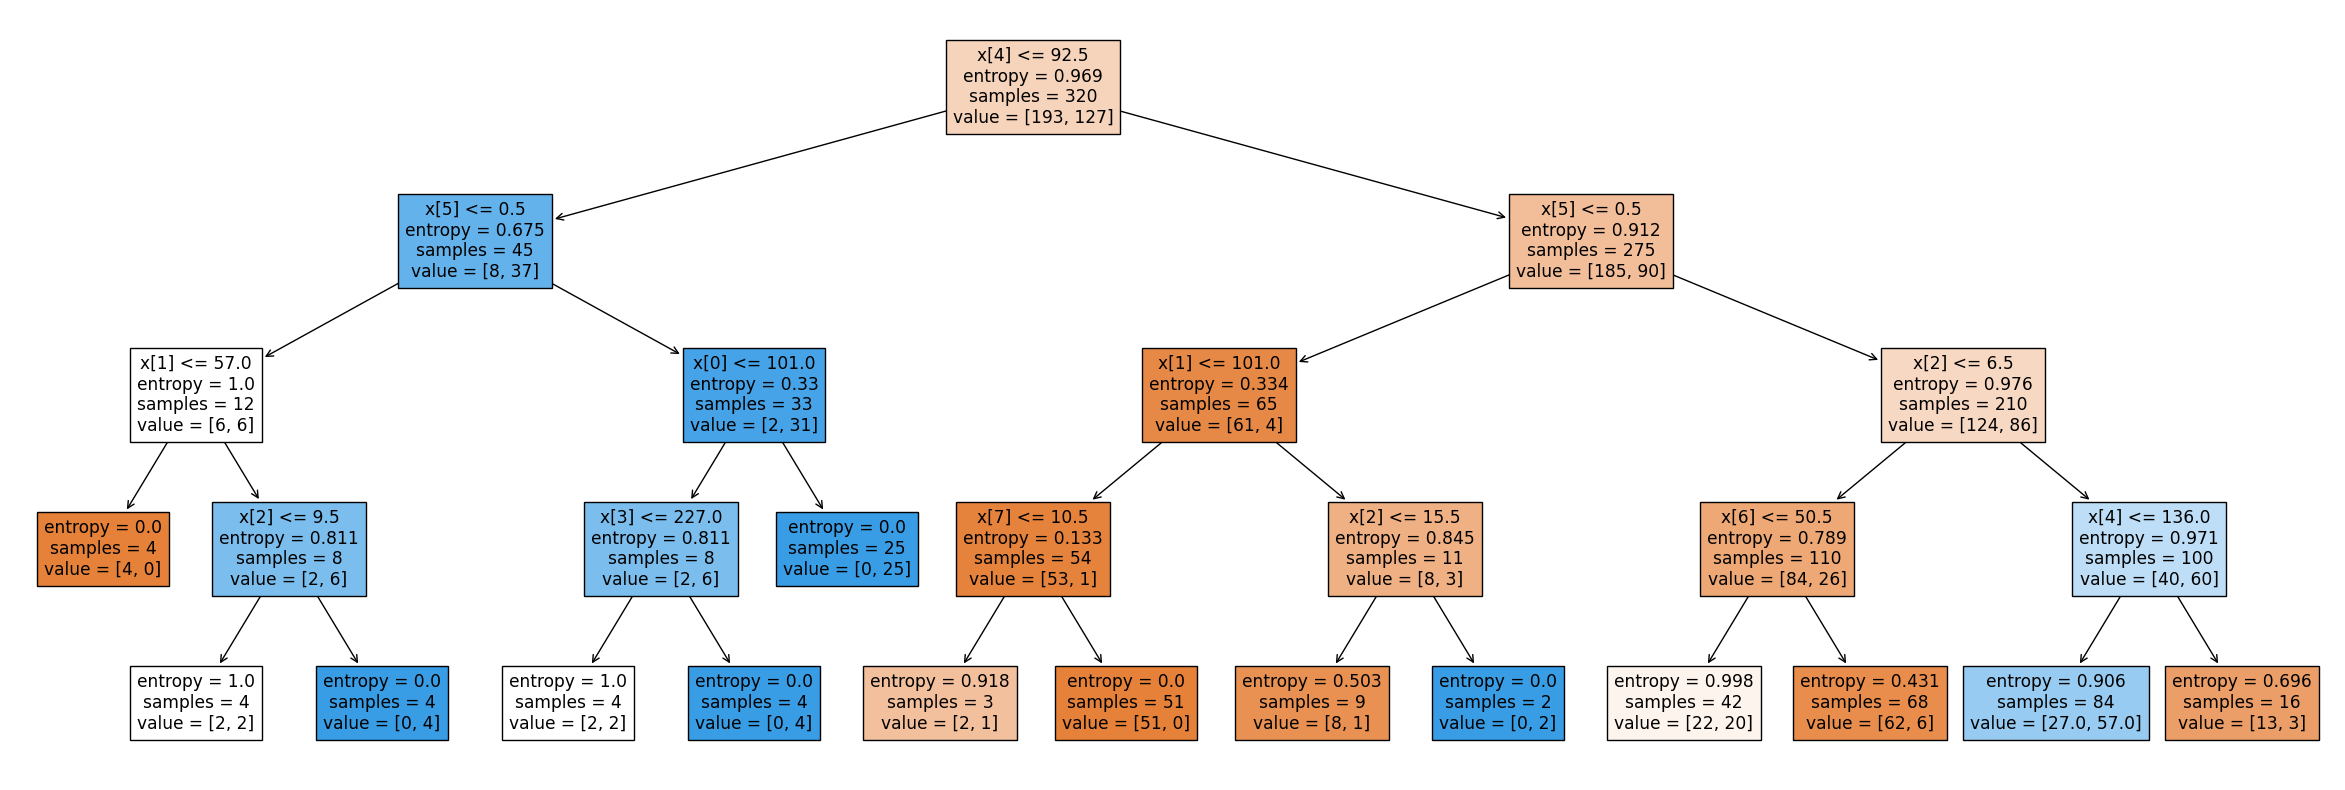

In [21]:
# Plotting the decision tree
plt.figure(figsize=(30, 10))  
plot_tree(clf_en, filled=True)
plt.show()

### Insights

The accuracy of 0.75 indicates that the decision tree correctly classified 75% of the samples in the evaluation dataset. While this is a reasonable starting point, it's important to consider other metrics and techniques.

Pruning can be one of the methods which can be used to increase the prediction of the tree.

The model shows promising results with a precision of 76%, meaning it's fairly reliable when it predicts "Yes" cases. However, its recall is at 68%, indicating there’s some room for improvement in capturing all the actual positive instances. The F1 score of 72% suggests a good balance between precision and recall, while an overall accuracy of 75% means it correctly predicts three-quarters of the cases. Together, these metrics give a clear picture of the model's performance:

#### Conclusion:
it does well in predicting "Yes" but could enhance its ability to identify more positive cases, pointing to potential areas for improvement in classifying the "Yes" class.